# Data Science - Sales Analysis

In [1]:
import pandas as pd
import os

### 1 - Merging multiple data files into a single file

In [2]:
files = [file for file in os.listdir('Sales_Data')]
for file in files:
    print(file)

Sales_July_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv
Sales_April_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv


In [3]:
files = [file for file in os.listdir('Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
186846,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
186847,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
186848,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"
186849,209920,ThinkPad Laptop,1,999.99,05/18/19 23:07,"43 5th St, Atlanta, GA 30301"


### 2 - Add month column

In [5]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07


### 3 - Clean up the data

In [6]:
df_nan = all_data[all_data.isna().any(axis=1)]   #All nan data in df. "axis=1 -> At least one at a column"
df_nan.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Delete the row if every fields are NaN # how=any to delete row if appears at least one.
all_data = all_data.dropna(how='all')

In [8]:
all_data.groupby('Month').count() # I did it to see if appears another value isntead of months 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Month,,,,,,
01,9709,9709,9709,9709,9709,9709
02,11975,11975,11975,11975,11975,11975
03,15153,15153,15153,15153,15153,15153
04,18279,18279,18279,18279,18279,18279
05,16566,16566,16566,16566,16566,16566
06,13554,13554,13554,13554,13554,13554
07,14293,14293,14293,14293,14293,14293
08,11961,11961,11961,11961,11961,11961
09,11621,11621,11621,11621,11621,11621


#### Delete 'Or

In [9]:
all_data = all_data[all_data['Month'].str[:2] != 'Or']

In [10]:
all_data['Month'] = all_data['Month'].astype('int32') # Converting Month into an int32
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7


In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### Converting columns to the correct type

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #float

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


### 4 - Answering Questions

#### 4 Question 1: Whats is the best month for sales? How much was earned that month?

In [14]:
all_data['Subtotal'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Subtotal
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84


In [15]:
results = all_data.groupby('Month').sum()#['Subtotal']

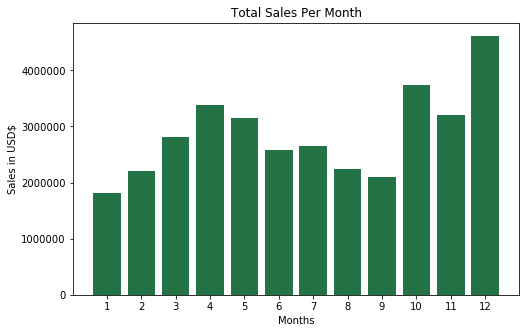

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

months = range(1,13)
plt.bar(months, results['Subtotal'], color='#247346')
plt.xticks(months)
plt.title('Total Sales Per Month')
plt.xlabel('Months')
plt.ylabel('Sales in USD$')
plt.show()

#### 4 Question 2: What city had the highest number of sales?

In [17]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Subtotal
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84


In [18]:
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# Another way to do the same thing bellow.

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x))

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Subtotal,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA


In [19]:
city_sales = all_data.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Subtotal
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


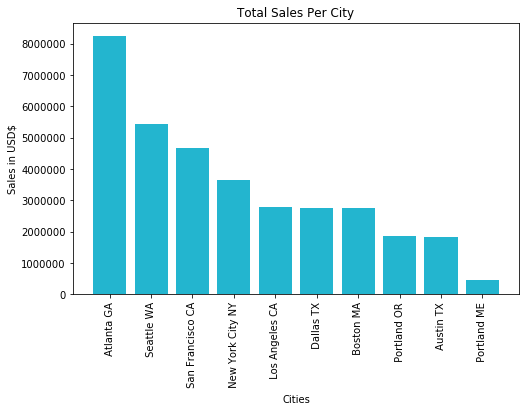

In [20]:
plt.figure(figsize=(8, 5))

cities = all_data['City'].unique()

plt.bar(cities, city_sales.Subtotal.sort_values(ascending=False), color='#23b5cf')
plt.xticks(cities, rotation='vertical', size=10)
plt.title('Total Sales Per City')
plt.xlabel('Cities')
plt.ylabel('Sales in USD$')
plt.show()

#### 4 Question 3: What's the best time to get results on advertisements?

In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour # .dt.minute
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Subtotal,City,Hour
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA,16
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA,8
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA,12


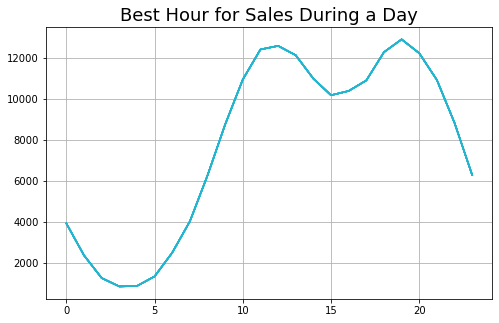

In [23]:
hours = [hour for hour, x in all_data.groupby('Hour')]

plt.figure(figsize=(8,5))
plt.style.use('default')
plt.plot(hours, all_data.groupby(['Hour']).count(), color='#23b5cf')
plt.title('Best Hour for Sales During a Day', fontsize=18)
plt.grid()


plt.show()